<a href="https://colab.research.google.com/github/ntlgiang/Coursera_Capstone/blob/master/Pet_Classification_Model_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pet Classification Model Using CNN**

**DESCRIPTION**

**Project Objective:**


Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 


**Project Description and Scope:**


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 


**Project Guidelines:**


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 
Input layer 

*   Convolutional layer 1 with 32 filters of kernel size[5,5] 

*   Pooling layer 1 with pool size[2,2] and stride 2 
*   Convolutional layer 2 with 64 filters of kernel size[5,5] 


*   Pooling layer 2 with pool size[2,2] and stride 2 


*   Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
*   Dropout layer with dropout probability 0.4 

Predict the class by doing a softmax on the output of the dropout layers. 
This should be followed by training and evaluation: 

*   For the training step, define the loss function and minimize it 
*   For the evaluation step, calculate the accuracy 

Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

**Install Keras to Google Colab environment**

In [29]:
pip install keras 

**Import the libraries**

In [2]:
# for numerical things
import numpy as np

# opencv & matplotlib to deal with images
import cv2
import matplotlib.pyplot as plt

# os for file system related tasks
import os

# random to fix seeds
import random
import tensorflow as tf
import torch

# import keras to build CNN model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

**Build the CNN model to train it to detect whether it's cat or a dog** 

In [3]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

Creating the CNN layers as follows...

● Input layer

● Convolutional layer 1 with 32 filters of kernel size[5,5]

● Pooling layer 1 with pool size[2,2] and stride 2

● Convolutional layer 2 with 64 filters of kernel size[5,5]

● Pooling layer 2 with pool size[2,2] and stride 2

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32

● Dropout layer with dropout probability 0.4

In [4]:
fc_size=32
IMAGE_SHAPE = 128

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)


output_layer = Dense(1, activation='sigmoid')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dense (Dense)                (None, 29, 29, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0     

**Visualizing the CNN Layers**

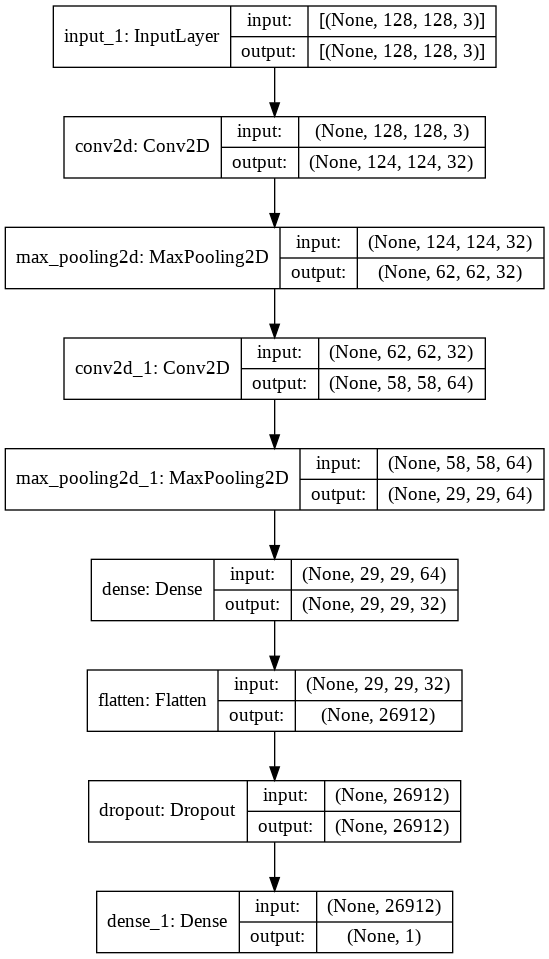

In [5]:
plot_model(model, show_shapes=True)

**Load the dataset**

In [6]:
train_data_generator = ImageDataGenerator(
    # We divide each pixel value(0, 255) with 255 to make them in range [0, 1]
    rescale = 1./255, 
    
    # We randomly shear & zoom our image while training to make our training robust
    shear_range = 0.2, 
    zoom_range = 0.2, 
    
    # We also flip our images by 180 degree horizontally to make our training robust
    horizontal_flip = True)

test_data_generator = ImageDataGenerator(
    rescale = 1./255)

In [7]:
training_set_data = train_data_generator.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Pet Classification/train", 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary')

test_set_data = test_data_generator.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Dataset/Pet Classification/test",
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


**Fit the dataset into model with 100 iterations**

In [30]:
model.fit_generator(
    training_set_data, 
    epochs = 100, 
    validation_data = test_set_data,)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0593 - accuracy: 0.9750 - val_loss: 2.4064 - val_accuracy: 0.5500
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 2.7034 - val_accuracy: 0.5500
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 2.9504 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 3.0104 - val_accuracy: 0.5500
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 2.9362 - val_accuracy: 0.5500
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 0.0724 - accuracy: 0.9750 - val_loss: 2.5114 - val_accuracy: 0.5500
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 0.0620 - accuracy: 0.9750 - val_loss: 1.8711 - val_accuracy: 0.6000
Epoch 8/100
1/1 [=================

**Fit the dataset into model with 200 iterations**

In [31]:
model.fit_generator(
    training_set_data, 
    epochs = 200, 
    validation_data = test_set_data,)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.4540 - val_accuracy: 0.6000
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 8.7302e-04 - accuracy: 1.0000 - val_loss: 3.4814 - val_accuracy: 0.6000
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 3.5201 - val_accuracy: 0.6000
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 5.6641e-04 - accuracy: 1.0000 - val_loss: 3.5578 - val_accuracy: 0.6000
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 5.2801e-04 - accuracy: 1.0000 - val_loss: 3.5970 - val_accuracy: 0.6000
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 4.9862e-04 - accuracy: 1.0000 - val_loss: 3.6322 - val_accuracy: 0.6000
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 6.2275e-04 - accuracy: 1.0000 - val_loss: 3.6681 - val_accuracy: 0.6000
Epoch 8/200
1/

**Fit the dataset into model with 300 iterations**

In [32]:
model.fit_generator(
    training_set_data, 
    epochs = 300, 
    validation_data = test_set_data,)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 7.2601e-04 - accuracy: 1.0000 - val_loss: 3.9820 - val_accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 2s 2s/step - loss: 7.8609e-04 - accuracy: 1.0000 - val_loss: 3.6687 - val_accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 2s 2s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 3.3801 - val_accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 2s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.1073 - val_accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 2s 2s/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 2.9300 - val_accuracy: 0.6000
Epoch 6/300
1/1 [==============================] - 2s 2s/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.0348 - val_accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 2s 2s/step - loss: 0.1345 - accuracy: 0.9250 - val_loss: 3.5030 - val_accuracy: 0.7000
Epoch 8/300
1/1 [=========

**REPORT**

100 iteration: Loss 0.0015 Accuracy 1.0000

200 iteration: Loss  0.0310 Accuracy 0.9750

300 iteration: Loss 4.2522e-04 Accuracy: 1.0000 

**Verify the model by using test data**



Model : It's a DOG


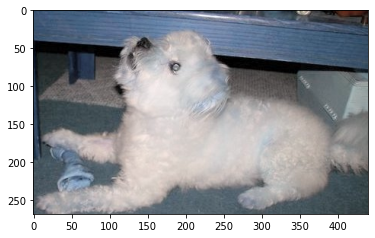

In [39]:
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/Dataset/Pet Classification/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[5]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

Model : It's a CAT


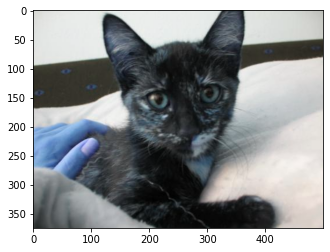

In [24]:
TEST_PATH = "/content/drive/MyDrive/Colab Notebooks/Dataset/Pet Classification/test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_dog_img = test_dogs_images[8]
test_dog_img = cv2.imread(TEST_PATH + os.sep+ "cats/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")